# Challenge 2

In this lab you will partner with another student to conduct **[pair programming](https://en.wikipedia.org/wiki/Pair_programming)**. In the next 60 minutes there will be 2 coding sessions of 30 minutes each. In each sessoin, one student will be the **driver** to write the code to solve the problem while the other student will be the **observer** to watch and review. There will be several iterations of your code because the observer will help the driver review the codes and make improvements until the 15 minute session ends. After the coding session ends, the driver and observer will switch roles.

#### Import all the libraries that are necessary

In [2]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Preparation

#### Import the `Fitbit2.csv` file and name your dataset `fitbit`

In [3]:
fitbit=pd.read_csv('Fitbit2.csv')
fitbit.head(2)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.0,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.4,92.086331,May,5


In [4]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        367 non-null    object 
 1   Calorie burned              367 non-null    int64  
 2   Steps                       367 non-null    int64  
 3   Distance                    367 non-null    float64
 4   Floors                      367 non-null    int64  
 5   Minutes Sedentary           367 non-null    float64
 6   Minutes Lightly Active      367 non-null    int64  
 7   Minutes Fairly Active       367 non-null    int64  
 8   Minutes Very Active         367 non-null    int64  
 9   Activity Calories           367 non-null    int64  
 10  MinutesOfSleep              367 non-null    int64  
 11  MinutesOfBeingAwake         367 non-null    int64  
 12  NumberOfAwakings            367 non-null    int64  
 13  LengthOfRestInMinutes       367 non

In [5]:
fitbit.isnull().sum()

Date                          0
Calorie burned                0
Steps                         0
Distance                      0
Floors                        0
Minutes Sedentary             0
Minutes Lightly Active        0
Minutes Fairly Active         0
Minutes Very Active           0
Activity Calories             0
MinutesOfSleep                0
MinutesOfBeingAwake           0
NumberOfAwakings              0
LengthOfRestInMinutes         0
Distance_miles                0
Days                          0
Days_encoded                  0
Work_or_Weekend               0
Hours Sleep                   0
Sleep efficiency              0
Yesterday_sleep               0
Yesterday_sleep_efficiency    0
Months                        0
Months_encoded                0
dtype: int64

## Coding Session I - 30 minutes

From the Fitbit data, we want to visually understand: 

1. **How the average number of steps change by month. Use the appropriate visualization to show the median steps by month?**
1. **Is Fitbitter more active on weekend or workdays?**

##### All plots must be in the same jupyter notebook cell.

Hints:

- Use `Months_encoded` and `Week_or Weekend` columns
- Use `matplolib.pyplot` object oriented API
- Set your size figure to `12,4`
- Explore `plt.sca`
- Explore `plt.xticks`
- Save your figures

In [19]:
# Driver 1 enter codes here
df = fitbit.groupby(['Months_encoded']).agg({'Steps':'mean'}).astype(int).reset_index()
df

,Months_encoded,Steps
0,1,9892
1,2,8922
2,3,10312
3,4,13079
4,5,10620
5,6,12536
6,7,9193
7,8,11584
8,9,9191
9,10,8272


In [24]:
df2 = fitbit.groupby(['Work_or_Weekend']).agg({'Steps':'mean'}).astype(int).reset_index()
df2

,Work_or_Weekend,Steps
0,0,10064
1,1,10144


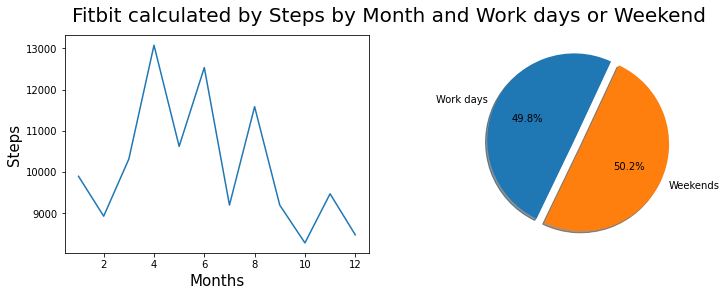

In [47]:
x = df['Months_encoded']
y = df['Steps']
fig, (x1, x2) = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('Fitbit calculated by Steps by Month and Work days or Weekend', fontsize=20)
x1.set_ylabel('Steps', fontsize=15)
x1.set_xlabel('Months', fontsize=15)
x1.plot(x, y)

w = df2['Work_or_Weekend']
z = df2['Steps']
labels = 'Work days','Weekends'
explode = (0.1,0)
x2.pie(z, explode=explode, labels=labels, shadow=True, startangle=65, autopct='%1.1f%%')
plt.show()


## Coding Session II - 30 minutes

**Write a loop to plot 3 scatter plots of the following features:**

1. **`Minutes Lightly Active`  vs `Steps`**
1. **`Minutes Very Active` vs `Steps`**
1. **`Minutes Sedentary` vs `Steps`**

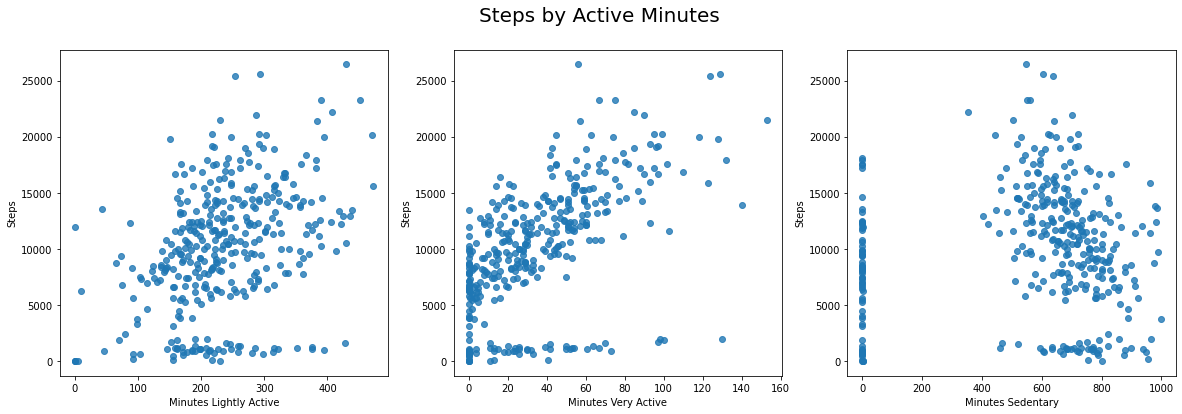

In [13]:
data = fitbit[['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary','Steps']]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
fig.suptitle('Steps by Active Minutes', fontsize=20)

for i in range(3):
    plt.sca(axes[i])
    plt.ylabel('Steps')
    plt.xlabel(data.iloc[:,i].name)
    plt.scatter(data.iloc[:,i], data['Steps'], alpha = 0.8)

plt.show()